In [ ]:
!pip install -U tensorflow-io==0.16.0
!pip install labelme
# restart runtime
import os
os.kill(os.getpid(), 9)

# **Libraries & Load Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

import os
import sys
import labelme
import random
import pandas as pd
# from IPython.display import display
from IPython import display
pd.options.display.max_columns = None
import numpy as np
import datetime
import time

import cv2
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use("dark_background")

import tensorflow_io as tfio
import tensorflow as tf
import tensorflow.keras.backend as K
print(tf.__version__)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


[INFO   ] utils:_init_num_threads:160 - NumExpr defaulting to 2 threads.
INFO:numexpr.utils:NumExpr defaulting to 2 threads.


2.3.4


## **Create dataset (DHYD -> LGG)**

In [ ]:
# !unrar x "/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD.rar" "/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/"


In [17]:
# mask_files_T1 = glob('/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/*/*T1 fl*/*.json*')
# train_files_T1 = glob('/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/*/*T1 fl*/*.jpg*')
# print(mask_files_T1)
# print(train_files_T1)
# print(len(mask_files_T1))
# print(len(train_files_T1))

# mask_files_T2 = glob('/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/*/*T2 PROP*/*.json*')
# train_files_T2 = glob('/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/*/*T2 PROP*/*.jpg*')
# print(mask_files_T2)
# print(train_files_T2)
# print(len(mask_files_T2))
# print(len(train_files_T2))

# mask_files_FLAIR = glob('/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/*/*T2 FLAIR enhflair*/*.json*')
# train_files_FLAIR = glob('/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/*/*T2 FLAIR enhflair*/*.jpg*')
# print(mask_files_FLAIR)
# print(train_files_FLAIR)
# print(len(mask_files_FLAIR))
# print(len(train_files_FLAIR))

# train_files = train_files_T1 + train_files_T2 + train_files_FLAIR
# mask_files = mask_files_T1 + mask_files_T2 + mask_files_FLAIR
# print(train_files)
# print(mask_files)
# print(len(train_files))
# print(len(mask_files))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# mask_files = glob('/content/drive/My Drive/Nam4_HK2/LV_CT595/pix2pix/Dataset_BenhVien_DHYD/*/*FLAIR*/*.json*')
# train_files = glob('/content/drive/My Drive/Nam4_HK2/LV_CT595/pix2pix/Dataset_BenhVien_DHYD/*/*FLAIR*/*.jpg*')
# print(train_files)
# print(mask_files)
# print(len(train_files))
# print(len(mask_files))



**Create Mask 0 for img**

In [18]:
# mask_0 = np.zeros((512, 512), dtype=np.uint8)
# # print(mask_0)
# # print(mask_0.shape)
# # plt.figure()
# # plt.imshow(mask_0, cmap='gray')
# for namefile in train_files:
#   name_img = namefile[:-4] + '.json'
#   if name_img not in mask_files:
#     cv2.imwrite(namefile[:-4]+"_mask.jpg", mask_0)

**Mask .json -> Mask .jpg** mask 1

In [ ]:
# list_label_name_to_value = {} #Dat ten Label k giong nhau
# for i in range(100):
#   list_label_name_to_value[str(i)] = 255
# print(list_label_name_to_value)
# list_label_name_to_value['tumor'] = 255
# list_label_name_to_value['Tumor'] = 255
# list_label_name_to_value['labels.txt'] = 255



# for filename in mask_files:
#   label_file = labelme.LabelFile(filename=filename)
#   print(filename)
#   img = labelme.utils.img_data_to_arr(label_file.imageData)
#   lbl, _ = labelme.utils.shapes_to_label(img_shape=img.shape, shapes=label_file.shapes, label_name_to_value=list_label_name_to_value)
#   filemask = filename[:-5] + '_mask.jpg' #"drop .json"
#   print(filemask)
#   cv2.imwrite(filemask, lbl)
#   # plt.figure()
#   # plt.imshow(lbl, cmap='gray')

## **LOAD DATA**

In [86]:
mask_files_T1 = glob('/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/*/*T1 fl*/*_mask*')
train_files_T1 = [file.replace('_mask', '') for file in mask_files_T1]
print(mask_files_T1)
print(train_files_T1)
print(len(mask_files_T1))
print(len(train_files_T1))

mask_files_T2 = glob('/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/*/*T2 PROP*/*_mask*')
train_files_T2 = [file.replace('_mask', '') for file in mask_files_T2]
print(mask_files_T2)
print(train_files_T2)
print(len(mask_files_T2))
print(len(train_files_T2))



['/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/BÀNH THỊ DIỆU/Series_015_Sag T1 fl/IM000000_mask.jpg', '/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/BÀNH THỊ DIỆU/Series_015_Sag T1 fl/IM000001_mask.jpg', '/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/BÀNH THỊ DIỆU/Series_015_Sag T1 fl/IM000002_mask.jpg', '/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/BÀNH THỊ DIỆU/Series_015_Sag T1 fl/IM000003_mask.jpg', '/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/BÀNH THỊ DIỆU/Series_015_Sag T1 fl/IM000004_mask.jpg', '/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/BÀNH THỊ DIỆU/Series_015_Sag T1 fl/IM000005_mask.jpg', '/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/BÀNH THỊ DIỆU/Series_015_Sag T1 fl/IM000006_mask.jpg', '/content/drive/My Drive/N

In [87]:
mask_files_FLAIR = glob('/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/*/*T2 FLAIR enhflair*/*_mask*')
train_files_FLAIR = [file.replace('_mask', '') for file in mask_files_FLAIR]
print(mask_files_FLAIR)
print(train_files_FLAIR)
print(len(mask_files_FLAIR))
print(len(train_files_FLAIR))

train_files = train_files_T1 + train_files_T2 + train_files_FLAIR
mask_files = mask_files_T1 + mask_files_T2 + mask_files_FLAIR
print(train_files)
print(mask_files)
print(len(train_files))
print(len(mask_files))

Output hidden; open in https://colab.research.google.com to view.

In [104]:
def diagnosis(mask_path):
  value = np.max(cv2.imread(mask_path))
  return 1 if value > 0 else 0

# print(len('/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_paper2/Dataset_BenhVien_DHYD/')) #79
START_NAME = 79
LEN_NAME = 21 

def patient(mask_path, START_NAME, LEN_NAME):
  return mask_path[START_NAME:START_NAME+LEN_NAME]

df = pd.DataFrame({"patient": [patient(x, START_NAME, LEN_NAME) for x in mask_files],
                   "image_path": train_files,
                   "mask_path": mask_files,
                   "diagnosis":[diagnosis(x) for x in mask_files]})
df

,patient,image_path,mask_path,diagnosis
0,BÀNH THỊ DIỆU/Ser,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,0
1,BÀNH THỊ DIỆU/Ser,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,0
2,BÀNH THỊ DIỆU/Ser,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,0
3,BÀNH THỊ DIỆU/Ser,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,0
4,BÀNH THỊ DIỆU/Ser,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,0
...,...,...,...,...
6897,ĐỖ THỊ THÚY VÂN/,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,1
6898,ĐỖ THỊ THÚY VÂN/,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,1
6899,ĐỖ THỊ THÚY VÂN/,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,1
6900,ĐỖ THỊ THÚY VÂN/,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2...,1


## **Data Distribution & Visualization**

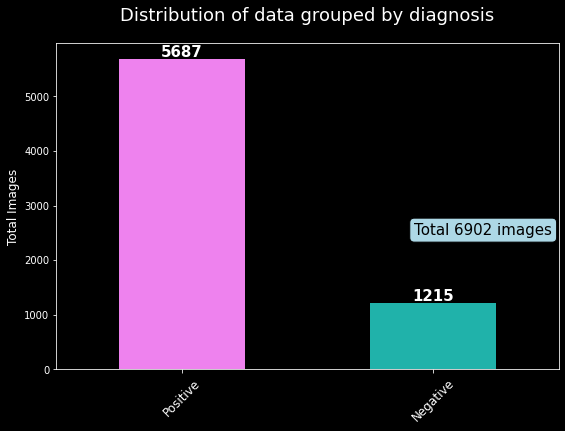

In [105]:
# Plot
ax = df.diagnosis.value_counts().plot(kind='bar',
                                      stacked=True,
                                      figsize=(9, 6),
                                     color=["violet", "lightseagreen"])


ax.set_xticklabels(["Positive", "Negative"], rotation=45, fontsize=12);
ax.set_ylabel('Total Images', fontsize = 12)
ax.set_title("Distribution of data grouped by diagnosis",fontsize = 18, y=1.05)

# Annotate
for i, rows in enumerate(df.diagnosis.value_counts().values):
    ax.annotate(int(rows), xy=(i, rows-12), 
                rotation=0, color="white", 
                ha="center", verticalalignment='bottom', 
                fontsize=15, fontweight="bold")
    
ax.text(1.2, 2550, f"Total {len(df)} images", size=15,
        color="black",
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   fc=("lightblue"),
                   ec=("black"),
                   )
         );

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138]),
 <a list of 139 Text major ticklabel objects>)

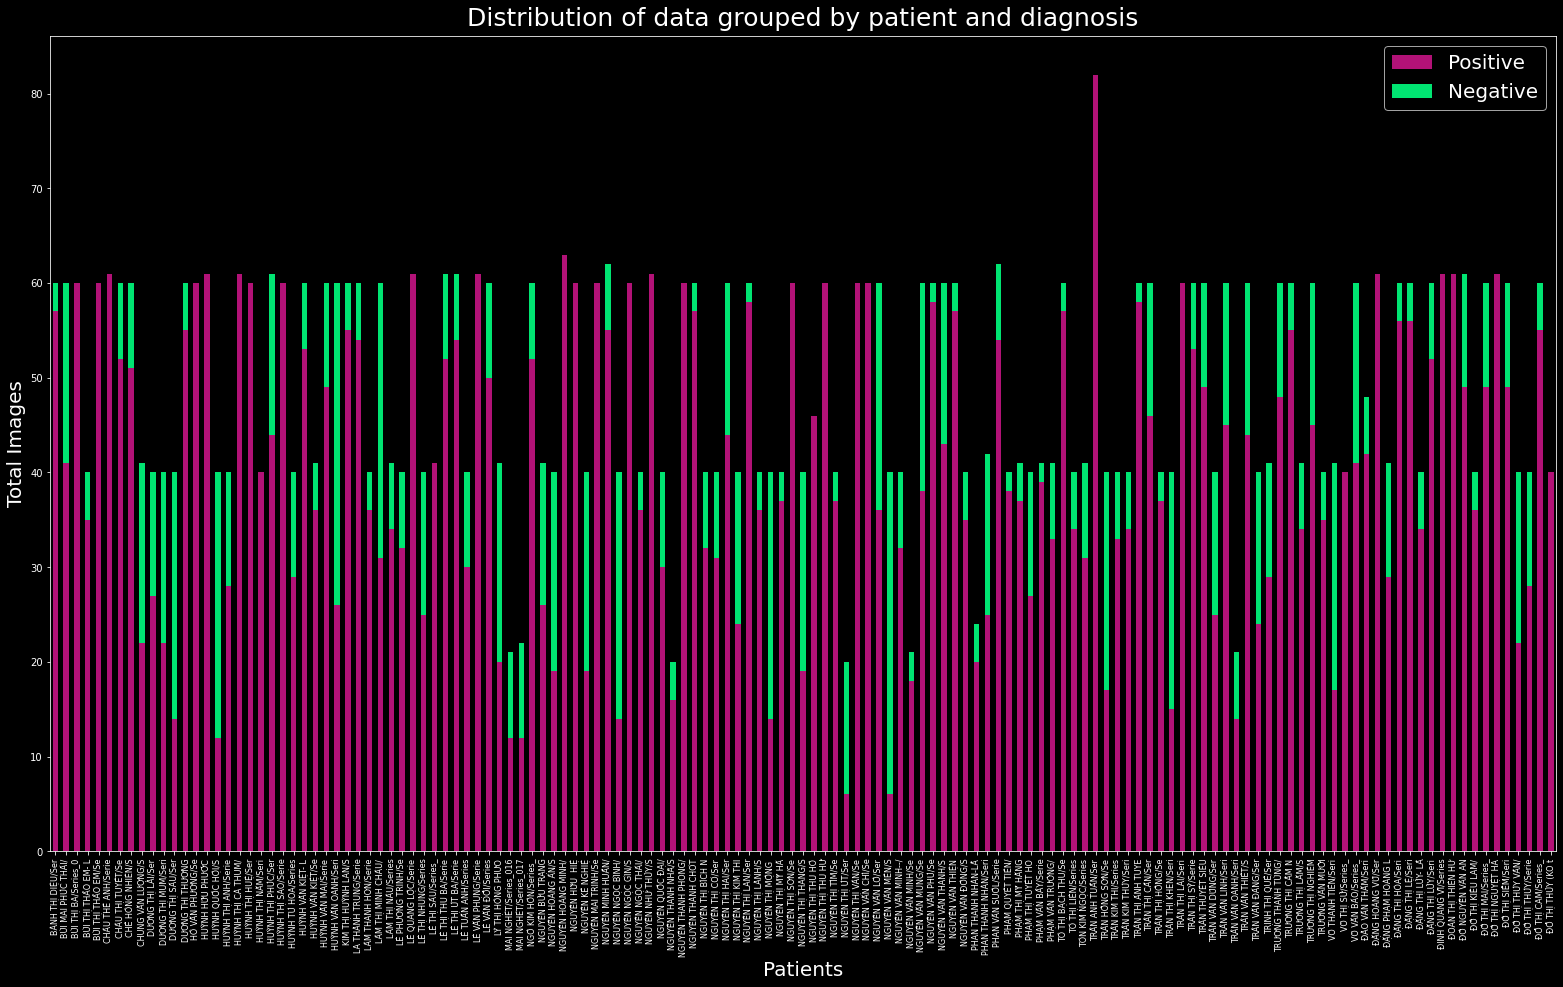

In [106]:
# Data
patients_by_diagnosis = df.groupby(['patient', 'diagnosis'])['diagnosis'].size().unstack().fillna(0)
patients_by_diagnosis.columns = ["Positive", "Negative"]

# Plot
ax = patients_by_diagnosis.plot(kind='bar',stacked=True,
                                figsize=(27, 15),
                                color=["mediumvioletred", "springgreen"], 
                                alpha=0.9)
ax.legend(fontsize=20);
ax.set_xlabel('Patients',fontsize = 20)
ax.set_ylabel('Total Images', fontsize = 20)
ax.set_title("Distribution of data grouped by patient and diagnosis",fontsize = 25, y=1.005)
plt.xticks(fontsize=8)


# # Annotations
# for i, rows in enumerate(patients_by_diagnosis.values):
#     plt.annotate(int(rows[0]), xy=(i, rows[0]+1), rotation=90, color="white")
#     plt.annotate(int(rows[1]), xy=(i, rows[1]+1), rotation=90, color="aqua");


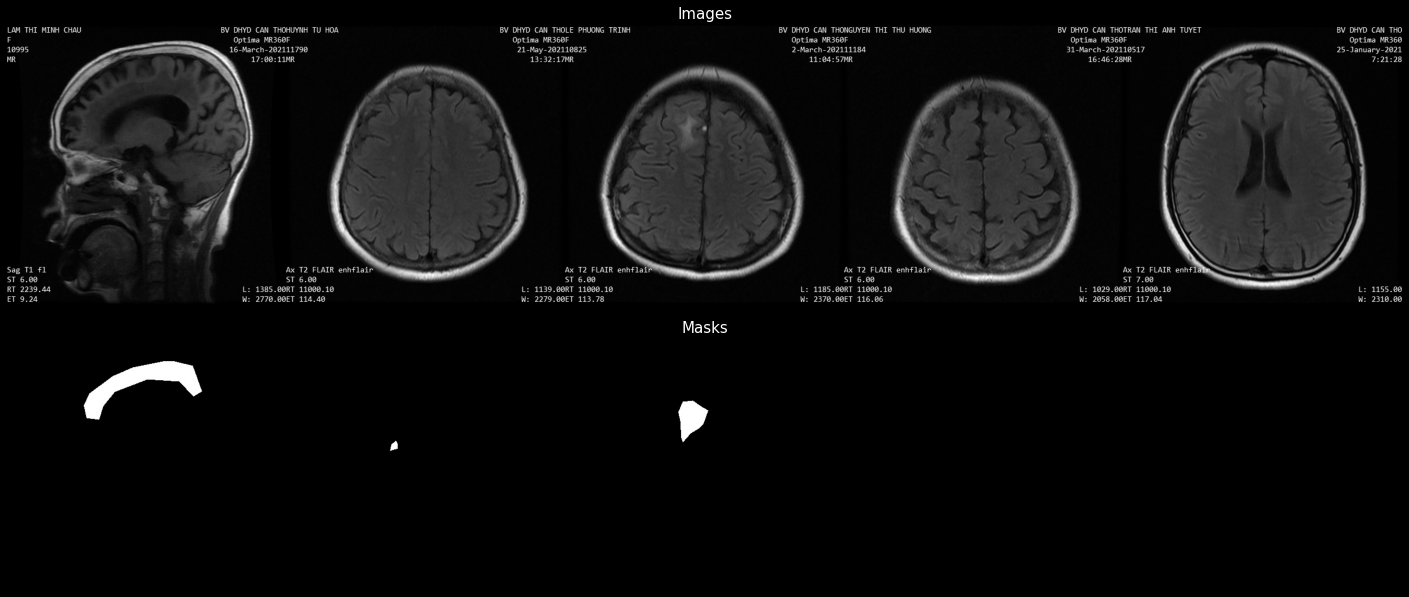

In [107]:
# Visualization (3 positive - 2 negative)

sample_df_positive = df[df["diagnosis"] == 1].sample(3)
sample_df_negative = df[df["diagnosis"] == 0].sample(2)
sample_df = sample_df_positive.append(sample_df_negative, ignore_index=True).values
sample_imgs = []
for i, data in enumerate(sample_df):
    #print(data)
    img = cv2.resize(cv2.imread(data[1]), (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask = cv2.resize(cv2.imread(data[2]), (512, 512))
    sample_imgs.extend([img, mask])


sample_imgs_arr = np.hstack(np.array(sample_imgs[::2]))
sample_masks_arr = np.hstack(np.array(sample_imgs[1::2]))

# Plot
fig = plt.figure(figsize=(25., 25.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 1),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


grid[0].imshow(sample_imgs_arr, cmap='gray')
grid[0].set_title("Images", fontsize=15)
grid[0].axis("off")
grid[1].imshow(sample_masks_arr)
grid[1].set_title("Masks", fontsize=15, y=0.9)
grid[1].axis("off")
plt.show()

## **Train/Test/Val**


Có tổng 139 BN

In [110]:
list_patient = df['patient'].value_counts().index.tolist()
print(len(list_patient))

import random
random.shuffle(list_patient)

# list_patient_val = list_patient[:10]
# list_patient_test = list_patient[10:30]
# list_patient_train = list_patient[30:]

# Lan 1
list_patient_val = ['ĐỖ THỊ THÚY/Serie', 'NGÔ KIM HÔN/Series_', 'LÝ THỊ HỒNG PHƯO', 'HUỲNH VĂN KIỆT/Se', 'HUỲNH THỊ NĂM/Seri', 'HUỲNH THỊ ANH/Serie', 'LÊ THỊ NHUNG/Series', 'ĐỔ THỊ CAM/Series_', 'PHẠM QUYẾT TIẾN/', 'ĐẶNG HOÀNG VŨ/Ser']

list_patient_test = ['TRẦN KIM THI/Series', 'LÊ PHƯƠNG TRINH/Se', 'NGUYỄN THANH NHÃ/S', 'NGUYỄN KẾ NGHIỆ', 'BÙI THỊ BA/Series_0', 'ĐỖ THỊ SIỂM/Seri', 'KIM THỊ HUỲNH LAN/S', 'NGUYỄN THỊ LÀNH/S', 'NGUYỄN VĂN CHÍ/Se', 'TRẦN ANH TUẤN/Ser', 'ĐẶNG THỊ LỦY- LÂ', 'TRẦN THUYẾT SIÊU', 'NGUYỄN BỬU TRẠNG', 'TRẦN THỊ SỶ/Serie', 'TRẦN THỊ HỒNG/Se', 'MAI NGHÉT/Series_017', 'TRẦN VĂN LINH/Seri', 'LÊ THỊ SÁU/Series_', 'NGUYỄN VĂN ĐÔNG/S', 'NGUYỄN THÀNH CHÓT']

list_patient_train =['TRẦN VĂN DŨNG/Ser', 'TRẦN HỒNG SƠN/Se', 'MAI NGHÉT/Series_016', 'ĐẶNG THỊ LỆ/Seri', 'NGUYỄN THỊ MỸ HĂ', 'ĐOÀN THỊ THIÊN HƯ', 'NGUYỄN THỊ CÓ/Ser', 'NGUYỄN THỊ MỘNG ', 'TÔ THỊ BẠCH THU/Se', 'NGUYỄN MAI TRINH/Se', 'BÙI MAI PHÚC THÁI/', 'TRƯƠNG THANH TÙNG/', 'TRƯƠNG VĂN MƯỜI', 'ĐỖ THỊ NGUYỆT HA', 'TRƯƠNG THỊ CẦM N', 'PHAN THANH NHÀN/Seri', 'HUỲNH VĂN KIỆT- L', 'HUỲNH THỊ PHÚC/Ser', 'NGUYỄN NGỌC BÌNH/', 'TRẦN THỊ ÁNH TUYE', 'NGUYỄN HỮU  HIỆ', 'NGUYỄN THỊ BÍCH N', 'NGUYỄN THỊ TÍM/Se', 'CHÂU THỊ TUYẾT/Se', 'NGUYỄN HOÀNG MINH/', 'HUỲNH QUỐC HỘI/S', 'LÂM THANH HƠN/Serie', 'NGUYỄN MINH HUẤN/', 'TRỊNH THỊ QUẾ/Ser', 'PHAN THANH NHÀN-LẦ', 'PHAN VĂN SUÔL/Serie', 'LÊ THỊ THU BA/Serie', 'TRẦN VĂN OANH/Seri', 'NGUYỄN VĂN PHÚ/Se', 'TRẦN THỊ KHEN/Seri', 'NGUYỄN THỊ KIM THI', 'NGUYỄN THỊ ÚT/Ser', 'ĐỖ THỊ MAI/Series_', 'ĐẶNG THỊ HÒA/Seri', 'ĐỔ THỊ THỦY (KO t', 'HUỲNH VĂN MAI/Serie', 'NGUYỄN VĂN THANH/S', 'TÔN KIM NGỌC/Series', 'NGUYỄN HOÀNG ÂN/S', 'NGUYỄN QUỐC ĐẠI/', 'ĐẶNG PHẠM HOÀNG L', 'TRƯƠNG THỊ LẮM/S', 'NGUYỄN NGỌC GÌN/S', 'TRẦN VĂN ĐÁNG/Ser', 'DƯƠNG THỊ MUM/Seri', 'DƯƠNG THỊ LÀI/Ser', 'LÊ QUANG LỘC/Serie', 'HUỲNH THỊ CÀ THUM/', 'PHẠM THỊ MỸ HẰNG', 'ĐINH QUANG VĨ/Series', 'VÕ VĂN BÁO/Series_', 'VÕ THANH TIẾN/Seri', 'BÙI THỊ THẢO EM/Se', 'NGUYỄN THANH PHONG/', 'ĐẶNG THỊ LỦY/Seri', 'ĐỖ THỊ THÚY VÂN/', 'NGUYỄN THỊ VÂN/Se', 'BÀNH THỊ DIỆU/Ser', 'HUỲNH THỊ SAO/Serie', 'HUỲNH HỮU PHƯỚC', 'NGUYỄN NHƯ THỦY/S', 'TRẦN THỊ LÀI/Seri', 'NGUYỄN NGỌC THÁI/', 'DƯƠNG THỊ SÁU/Ser', 'LÊ TUẤN ANH/Series', 'ĐÀO VĂN THẮM/Seri', 'TRẦN KIM THÚY/Seri', 'LA THÀNH TRUNG/Serie', 'PHẠM THỊ TUYẾT HO', 'NGUYỄN THỊ HAI/Ser', 'NGUYỄN THỊ SƠN/Se', 'TRẦN THỊ CẤN/Ser', 'HỒ VĂN PHƯƠNG/Se', 'TÔ THỊ LIÊN/Series', 'CHUNG VĂN LƯỢNG/S', 'LÊ VĂN ĐỔI/Series', 'BÙI THỊ THẢO EM- L', 'ĐỖ THỊ KIỀU LAM/', 'NGUYỄN THỊ THANG/S', 'TRƯƠNG THỊ NGHIÊM', 'NGUYỄN VĂN LÔ/Ser', 'NGUYỄN VĂN MINH/Se', 'CHÂU THẾ ANH/Serie', 'CHẾ HỒNG NHIÊN/S', 'NGUYỄN VĂN MUNG/Se', 'NGUYỄN VĂN MINH--/', 'NGUYỄN VĂN MẾN/S', 'NGUYỄN THỊ THU HÔ', 'LÊ VĂN PHỤNG/Serie', 'LÂM THỊ MINH CHÂU/', 'HUỲNH THỊ HUỆ/Ser', 'PHẠM VĂN TRƯỜNG/', 'LÂM THỊ NÂU/Series', 'TRẦN VĂN THIẾT/S', 'DƯƠNG THỊ THƯƠNG', 'HUỲNH VĂN OANH/Seri', 'LÊ THỊ ÚT BA/Serie', 'NGUYỄN THỊ LAN/Ser', 'HUỲNH TÚ HOA/Series', 'NGUYỄN VĂN THIỆN', 'PHẠM VĂN BẢY/Serie', 'NGUYỄN THỊ THU HƯ', 'ĐỖ NGUYỄN VĂN AN', 'VÕ THỊ SỬ/Series_']




print(list_patient_val)
print(len(list_patient_val))
print(list_patient_test)
print(len(list_patient_test))
print(list_patient_train)
print(len(list_patient_train))

# df_train: 76 
df_train = pd.DataFrame(columns=['patient', 'image_path', 'mask_path', 'diagnosis'])
for patient in list_patient_train:
  df_1patient = df[df['patient']==patient]
  df_train = pd.concat([df_train, df_1patient], ignore_index=True)

# df_val: 10 
df_val = pd.DataFrame(columns=['patient', 'image_path', 'mask_path', 'diagnosis'])
for patient in list_patient_val:
  df_1patient = df[df['patient']==patient]
  df_val = pd.concat([df_val, df_1patient], ignore_index=True)

# df_test: 20 
df_test = pd.DataFrame(columns=['patient', 'image_path', 'mask_path', 'diagnosis'])
for patient in list_patient_test:
  df_1patient = df[df['patient']==patient]
  df_test = pd.concat([df_test, df_1patient], ignore_index=True)


# shuffle
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_val = df_val.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)


print(df_train.shape, (df_train[df_train['diagnosis']==1]).shape)
print(df_val.shape, (df_val[df_val['diagnosis']==1]).shape)
print(df_test.shape, (df_test[df_test['diagnosis']==1]).shape)



139
['ĐỖ THỊ THÚY/Serie', 'NGÔ KIM HÔN/Series_', 'LÝ THỊ HỒNG PHƯO', 'HUỲNH VĂN KIỆT/Se', 'HUỲNH THỊ NĂM/Seri', 'HUỲNH THỊ ANH/Serie', 'LÊ THỊ NHUNG/Series', 'ĐỔ THỊ CAM/Series_', 'PHẠM QUYẾT TIẾN/', 'ĐẶNG HOÀNG VŨ/Ser']
10
['TRẦN KIM THI/Series', 'LÊ PHƯƠNG TRINH/Se', 'NGUYỄN THANH NHÃ/S', 'NGUYỄN KẾ NGHIỆ', 'BÙI THỊ BA/Series_0', 'ĐỖ THỊ SIỂM/Seri', 'KIM THỊ HUỲNH LAN/S', 'NGUYỄN THỊ LÀNH/S', 'NGUYỄN VĂN CHÍ/Se', 'TRẦN ANH TUẤN/Ser', 'ĐẶNG THỊ LỦY- LÂ', 'TRẦN THUYẾT SIÊU', 'NGUYỄN BỬU TRẠNG', 'TRẦN THỊ SỶ/Serie', 'TRẦN THỊ HỒNG/Se', 'MAI NGHÉT/Series_017', 'TRẦN VĂN LINH/Seri', 'LÊ THỊ SÁU/Series_', 'NGUYỄN VĂN ĐÔNG/S', 'NGUYỄN THÀNH CHÓT']
20
['TRẦN VĂN DŨNG/Ser', 'TRẦN HỒNG SƠN/Se', 'MAI NGHÉT/Series_016', 'ĐẶNG THỊ LỆ/Seri', 'NGUYỄN THỊ MỸ HĂ', 'ĐOÀN THỊ THIÊN HƯ', 'NGUYỄN THỊ CÓ/Ser', 'NGUYỄN THỊ MỘNG ', 'TÔ THỊ BẠCH THU/Se', 'NGUYỄN MA

## **Load Image/Mask with tf.Data**

Load img/mask

tf.Tensor(255.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
(512, 512, 1)
(512, 512, 1)


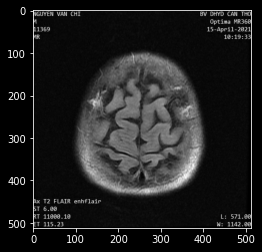

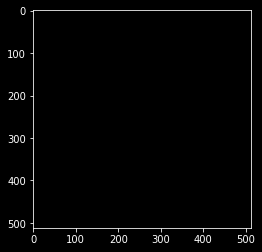

In [111]:
########## Load IMG/MASK
def load_imagemask(path_image, path_mask):


  image = tf.io.read_file(path_image)
  image = tf.io.decode_jpeg(image)
  # image = tf.image.resize(image, (256, 256)) #Resize (512->256)
  image = image[:,:,0]
  image = image[..., tf.newaxis]


  mask = tf.io.read_file(path_mask)
  mask = tf.io.decode_jpeg(mask)
  # mask = tf.image.resize(mask, (256, 256))
  mask = mask[:,:,0]
  mask = mask[..., tf.newaxis]


  image = tf.cast(image, tf.float32)
  mask = tf.cast(mask, tf.float32)


  return image, mask



IMG, LABEL = load_imagemask(df_test['image_path'].tolist()[1], df_test['mask_path'][1])

# Casting to int for matplotlib to display the images and mask
plt.figure()
plt.imshow(IMG[:,:,0], cmap='gray')
plt.figure()
plt.imshow(LABEL[:,:,0], cmap='gray')

# print(IMG, LABEL)
print(K.max(IMG)) #0-255
print(K.max(LABEL))
print(IMG.shape)
print(LABEL.shape)



**Pre-processing and load dataset**

In [112]:
# Standardize/Normalize  the images to [-1, 1]
def standardize(image, mask):
  image = (image - 127.5) / 127.5
  mask = (mask - 127.5) / 127.5

  return image, mask

# # [0,1]
# def standardize(image, mask):
#   image = image/255
#   mask = mask/255

#   return image, mask


def load_image_train(path_image, path_mask):
  image, mask = load_imagemask(path_image, path_mask)
  image, mask = standardize(image, mask)

  return image, mask

**Build an input pipeline with `tf.data`**

tf.Tensor(85, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
(64, 512, 512, 1)
(64, 512, 512, 1)
-1.0 1.0
-1.0 -1.0
(512, 512, 1)
(512, 512, 1)


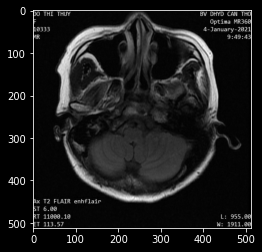

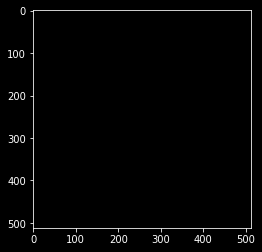

In [114]:
BATCH_SIZE = 64 #96


train_dataset = tf.data.Dataset.from_tensor_slices((df_train['image_path'].tolist(), df_train['mask_path'].tolist()))
train_dataset = (train_dataset
                 .map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                 .shuffle(320)
                 .batch(BATCH_SIZE, drop_remainder=True)
                )

val_dataset = tf.data.Dataset.from_tensor_slices((df_val['image_path'].tolist(), df_val['mask_path'].tolist()))
val_dataset = (val_dataset
                 .map(load_image_train)
                 .batch(BATCH_SIZE)
                )

test_dataset = tf.data.Dataset.from_tensor_slices((df_test['image_path'].tolist(), df_test['mask_path'].tolist()))
test_dataset = (test_dataset
                 .map(load_image_train)
                 .batch(BATCH_SIZE)
                )


print(tf.data.experimental.cardinality(train_dataset))
print(tf.data.experimental.cardinality(val_dataset))
print(tf.data.experimental.cardinality(test_dataset))




# Test
image_batch, labels_batch = next(iter(val_dataset.take(1)))
print(image_batch.shape)
print(labels_batch.shape)
IMG_Test = image_batch[0]
LABEL_Test = labels_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(IMG_Test), np.max(IMG_Test))
print(np.min(LABEL_Test), np.max(LABEL_Test))

# print(IMG_test)
# print(LABEL_test)
print(IMG_Test.shape)
print(LABEL_Test.shape)

plt.figure()
plt.imshow((IMG_Test[:,:,0]+1)/2, cmap='gray')
plt.figure()
plt.imshow((LABEL_Test[:,:,0]+1)/2, cmap='gray')



# **Predict**

## **Hyperparameters**

In [ ]:
LAMBDA = 20

#Learning rate
d_lr = 2e-4   
g_lr = 2e-4   

beta_1=0.5

## **Model G**

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 128, 128, 64) 1024        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 64, 64, 128)  131584      sequential[0][0]                 
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 32, 32, 256)  525312      sequential_1[0][0]               
_______________________________________________________________________________________

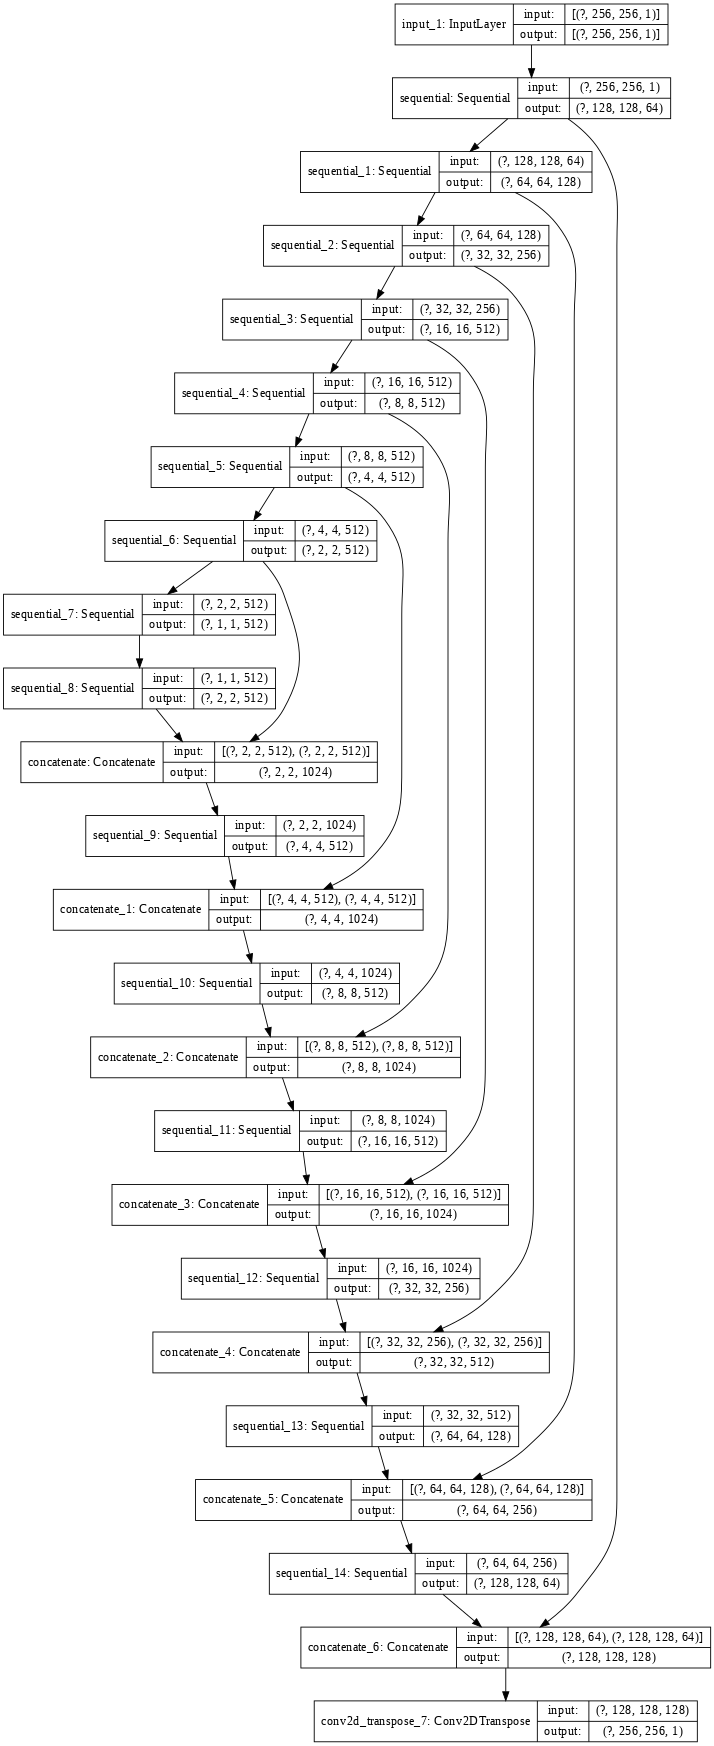

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, Concatenate, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal

def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result
 
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result
 
# define the standalone generator model
def Generator():
  inputs = tf.keras.layers.Input(shape=[256, 256, 1])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(1, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 1)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

# Generator G
G = Generator()
G.summary()
tf.keras.utils.plot_model(G, show_shapes=True, dpi=64)


In [ ]:
#Optimizers G
generator_optimizer = tf.keras.optimizers.Adam(g_lr, beta_1=beta_1)

## **Model D**

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
target_image (InputLayer)       [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
concatenate_7 (Concatenate)     (None, 256, 256, 2)  0           input_image[0][0]                
                                                                 target_image[0][0]               
__________________________________________________________________________________________________
sequential_15 (Sequential)      (None, 128, 128, 64) 2048        concatenate_7[0][0]   

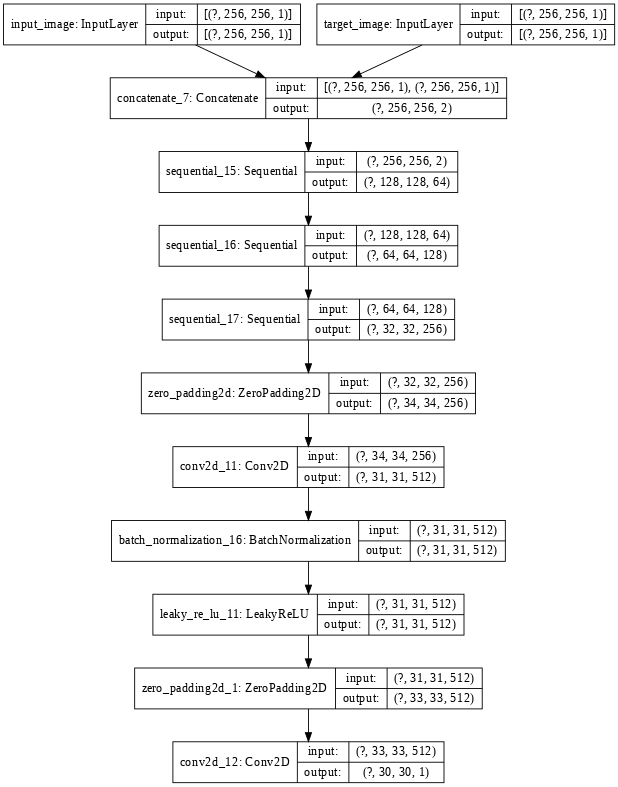

In [ ]:
# define the discriminator model
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 1], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 1], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)


D = Discriminator()
D.summary()
tf.keras.utils.plot_model(D, show_shapes=True, dpi=64)

In [ ]:
#Optimizers D
discriminator_optimizer = tf.keras.optimizers.Adam(d_lr, beta_1=beta_1)

# **Accuracy**

In [ ]:
# def dice_coef(y_true, y_pred):
#     y_truef=K.flatten(y_true)
#     y_predf=K.flatten(y_pred)
#     And=K.sum(y_truef* y_predf)
#     return((2* And + smooth) / (K.sum(y_truef) + K.sum(y_predf) ))

# def iou(y_true, y_pred):
#     intersection = K.sum(y_true * y_pred)
#     sum_ = K.sum(y_true + y_pred)
#     jac = (intersection + smooth) / (sum_ - intersection)
#     return jac

# Precision = TruePositive / (TruePositive + FalsePositive)
def Precision(y_true, y_pred): #K phat. khi doan sai 0->1
  y_true = (y_true+1)/2   #[-1,1] to [0,1]
  y_pred = (y_pred+1)/2   #[-1,1] to [0,1]
  y_pred = tf.cast((y_pred > 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
  #TruePositive
  TP = y_true*y_pred
  pr = K.sum(TP) / K.sum(y_true)
  if tf.math.is_nan(pr):
     pr = tf.constant(0.0)
  return pr

# iou = true_positives / (true_positives + false_positives + false_negatives)
def IoU(y_true, y_pred):
  y_true = (y_true+1)/2   #[-1,1] to [0,1]
  y_pred = (y_pred+1)/2   #[-1,1] to [0,1]
  y_pred = tf.cast((y_pred > 0.5), tf.float32)
  TP = y_true*y_pred
  FN = tf.nn.relu(y_pred - y_true) # <0 => = 0
  iou = K.sum(TP) / (K.sum(y_true) + K.sum(FN))
  if tf.math.is_nan(iou):
    iou = tf.constant(0.0)
  return iou

# Dice similarity coefficient (DSC)
# DSC = 2TP / (2TP + FP + FN)


# a = tf.constant([[0.0, 0, 0, 0], [0, 0, 0, 0]])
# b = tf.constant([[0.0, 1, -1, 0], [0.5, 0, 1, -0.5]])
# print(Precision(a,b))
# print(IoU(a,b))


## **Generate images**

(1, 256, 256, 1) (1, 256, 256, 1)


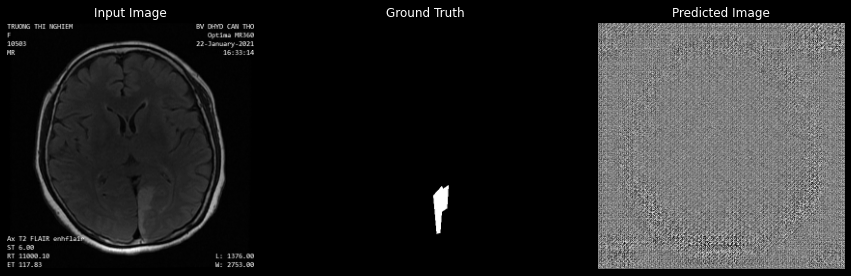

-1.0 1.0
-1.0 1.0


In [ ]:
def generate_images(model, test_input, tar):
  test_input= test_input[:,:,:,0]
  tar = tar[:,:,:,0]

  prediction = model(test_input, training=True)
  prediction = prediction[:,:,:,0]

  a = np.array(prediction[0])

  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], a]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i], cmap='gray')
    plt.axis('off')
  plt.show()


print(image_batch.shape, labels_batch.shape)
generate_images(G, image_batch, labels_batch)
print(np.min(image_batch), np.max(image_batch))
print(np.min(labels_batch), np.max(labels_batch))


## **CHECKPOINT**

In [ ]:
%cd /content/drive/My Drive/Nam4_HK2/LV_CT595/pix2pix/DHYD/
# Save model
checkpoint_dir = 'DHYD_training_checkpoints/model_P2P_Unet_(ChangeValue_L)_L2_96/L20/best/'
# checkpoint_dir = 'DHYD_training_checkpoints/model_P2P_Unet_(ChangeValue_L)_L2_96/L20/best/'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator= G,
                                 discriminator= D)


# Save history of loss funcion
log_dir="log_P2P/"

/content/drive/My Drive/Nam4_HK2/LV_CT595/pix2pix/DHYD


In [ ]:
!ls {checkpoint_dir}

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `ls DHYD_training_checkpoints/model_P2P_Unet_(ChangeValue_L)_L2_96/L20/best/'


In [ ]:
# Restoring the latest checkpoint in checkpoint_dir #Load G,D best
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

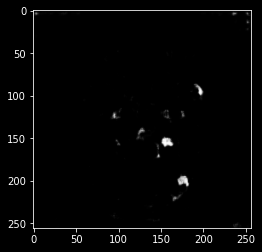

In [ ]:
# test
image_batch, labels_batch = next(iter(test_dataset.take(1)))
G_out = G(image_batch, training=True)

plt.imshow(G_out[0,:,:,0], cmap='gray')
plt.show()


# **Val**

In [ ]:
# Eval Val_ds
sum_Precision = 0.0
sum_IoU = 0.0
len_ds = 0
for img,tar in val_dataset:
  len_ds+=1
  g_out = G(img, training=True)
  pre = Precision(tar,g_out)
  iou = IoU(tar,g_out)
  if iou > 0:
    len_ds+=1
    sum_IoU += iou
    sum_Precision += pre
  print(pre)
  print(iou)

avr_Precision = sum_Precision/len_ds
avr_IoU = sum_IoU/len_ds
print("Trung binh")
print(avr_Precision)
print(avr_IoU)
# tf.Tensor(0.6232435, shape=(), dtype=float32) bs64
# tf.Tensor(0.4297046, shape=(), dtype=float32)

# tf.Tensor(0.5304647, shape=(), dtype=float32) bs1
# tf.Tensor(0.35831028, shape=(), dtype=float32)

In [ ]:
# # Run the trained model on a few examples from the test set
# for inp, tar in val_dataset.take(200):
#   generate_images(G, inp, tar)

# **Test**

In [ ]:
# Eval test_ds
sum_Precision = 0.0
sum_IoU = 0.0
len_ds = 0

vitri = 0
tyle1 = 0
tyle2 = 0
tyle3 = 0
tyle4 = 0

for img,tar in test_dataset:
  g_out = G(img, training=True)
  pre = Precision(tar,g_out)

  iou = IoU(tar,g_out)
  print(pre)
  print(iou)
  if iou > 0:
    len_ds+=1
    sum_IoU += iou
    sum_Precision += pre

  if iou == 0:
    vitri+=1
  if pre > 0 and pre < 0.25:
    tyle1 += 1
  if pre > 0.25 and pre < 0.5:
    tyle2 += 1
  if pre > 0.5 and pre < 0.75:
    tyle3 += 1
  if pre > 0.75:
    tyle4 += 1   

  
avr_Precision = sum_Precision/len_ds
avr_IoU = sum_IoU/len_ds
print("trung binh: ")
print(avr_Precision)
print(avr_IoU)
print(len_ds)
print("=0")
print(vitri)
print(tyle1,tyle2,tyle3,tyle4)

In [ ]:
# Run the trained model on a few examples from the test set
for inp, tar in test_dataset.take(700):
  generate_images(G, inp, tar)

# **Ve bieu do**